In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('eurusd_minute.csv', usecols=['Date', 'Time', 'BC', 'AC'])
df.rename(columns={"BC": "price"}, inplace=True)
df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.drop(['Date', 'Time','AC'], axis=1)
df = df.set_index('Datetime')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5618819 entries, 2005-01-02 18:29:00 to 2020-04-29 23:59:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
dtypes: float64(1)
memory usage: 85.7 MB


In [22]:
symbol = 'eur_usd'
window = 50
long_sma = 150
momentum_window = 3

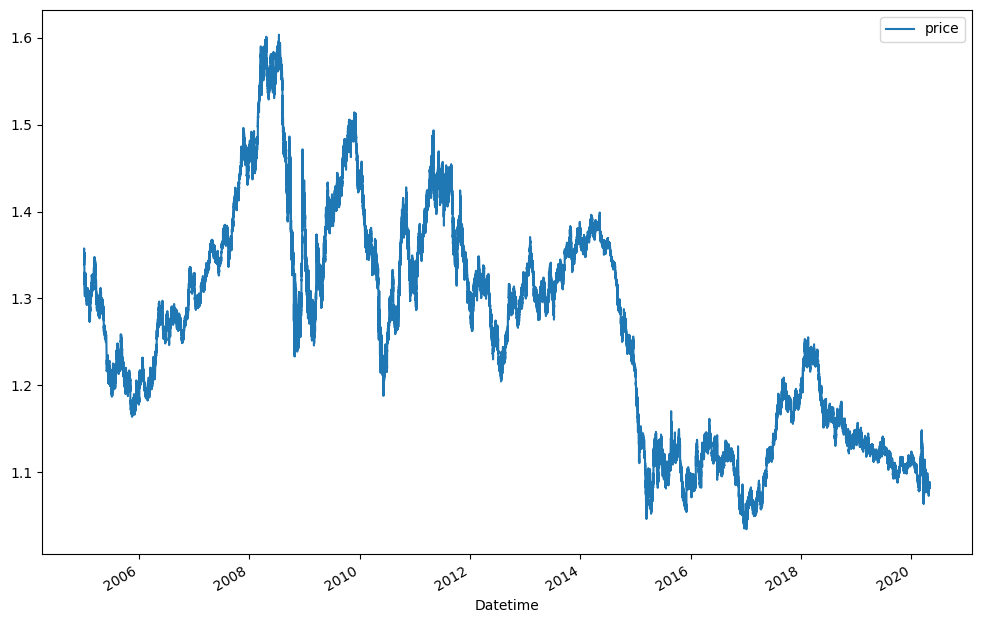

In [17]:
df.plot(figsize=(12, 8))
plt.show()

In [18]:
df['returns'] = np.log(df['price'] / df['price'].shift())

In [19]:
df

,price,returns
Datetime,,
2005-01-02 18:29:00,1.35550,NaN
2005-01-02 18:38:00,1.35550,0.000000
2005-01-02 18:51:00,1.35620,0.000516
2005-01-02 18:52:00,1.35600,-0.000147
2005-01-02 18:55:00,1.35630,0.000221
...,...,...
2020-04-29 23:55:00,1.08764,-0.000064
2020-04-29 23:56:00,1.08757,-0.000064
2020-04-29 23:57:00,1.08759,0.000018


In [23]:
data = df.copy()
data['dir'] = np.where(data['returns'] > 0, 1,0)
data['sma'] = data['price'].rolling(window).mean() - data['price'].rolling(long_sma).mean()
data['boll'] = (data['price'] - data['price'].rolling(window).mean()) / data['price'].rolling(window).std()
data['min'] = data['price'].rolling(window).min() / data['price'] - 1
data['max'] = data['price'].rolling(window).max() / data['price'] - 1
data['mom'] = data['returns'].rolling(momentum_window).mean()
data['vol'] = data['returns'].rolling(window).std()
data.dropna(inplace=True)
data

,price,returns,dir,sma,boll,min,max,mom,vol
Datetime,,,,,,,,,
2005-01-02 23:06:00,1.35625,0.000369,1,0.000201,2.286582,-0.001253,0.000000,1.966786e-04,0.000142
2005-01-02 23:07:00,1.35645,0.000147,1,0.000233,2.670209,-0.001401,0.000000,2.089440e-04,0.000142
2005-01-02 23:08:00,1.35655,0.000074,1,0.000266,2.762770,-0.001401,0.000000,1.966351e-04,0.000142
2005-01-02 23:09:00,1.35645,-0.000074,0,0.000300,2.382443,-0.001253,0.000074,4.915152e-05,0.000143
2005-01-02 23:10:00,1.35645,0.000000,0,0.000331,2.263452,-0.001180,0.000074,7.670730e-18,0.000142
...,...,...,...,...,...,...,...,...,...
2020-04-29 23:55:00,1.08764,-0.000064,0,0.000080,0.573415,-0.000340,0.000120,-2.758151e-05,0.000031
2020-04-29 23:56:00,1.08757,-0.000064,0,0.000085,0.123215,-0.000276,0.000184,-4.290635e-05,0.000032
2020-04-29 23:57:00,1.08759,0.000018,1,0.000090,0.220259,-0.000294,0.000166,-3.677654e-05,0.000032


In [75]:
data.describe()

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,...,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06,5.618556e+06
mean,1.267829e+00,-3.930426e-08,4.505522e-01,-2.381270e-06,3.566676e-03,-6.471597e-04,6.487117e-04,-3.931682e-08,1.374463e-04,4.505521e-01,...,-3.932227e-08,-3.931134e-08,-3.926980e-08,-3.922498e-08,-3.918506e-08,1.374463e-04,1.374463e-04,1.374464e-04,1.374464e-04,1.374464e-04
std,1.258612e-01,1.659728e-04,4.975490e-01,9.485922e-04,1.353684e+00,7.790879e-04,7.882823e-04,9.421859e-05,9.334948e-05,4.975489e-01,...,9.421859e-05,9.421860e-05,9.421863e-05,9.421867e-05,9.421871e-05,9.334947e-05,9.334946e-05,9.334945e-05,9.334944e-05,9.334943e-05
min,1.034310e+00,-1.495131e-02,0.000000e+00,-1.453427e-02,-6.929646e+00,-2.500669e-02,0.000000e+00,-5.076301e-03,4.505235e-06,0.000000e+00,...,-5.076301e-03,-5.076301e-03,-5.076301e-03,-5.076301e-03,-5.076301e-03,4.505235e-06,4.505235e-06,4.505235e-06,4.505235e-06,4.505235e-06
25%,1.143540e+00,-6.576135e-05,0.000000e+00,-3.637333e-04,-1.028537e+00,-8.411857e-04,1.670732e-04,-3.609587e-05,7.742673e-05,0.000000e+00,...,-3.609587e-05,-3.609587e-05,-3.609587e-05,-3.609581e-05,-3.609581e-05,7.742678e-05,7.742689e-05,7.742700e-05,7.742709e-05,7.742713e-05
50%,1.278920e+00,0.000000e+00,0.000000e+00,1.400000e-06,6.009773e-03,-4.170722e-04,4.140755e-04,0.000000e+00,1.142305e-04,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.142305e-04,1.142307e-04,1.142307e-04,1.142308e-04,1.142308e-04
75%,1.356950e+00,6.574694e-05,1.000000e+00,3.641333e-04,1.038516e+00,-1.701107e-04,8.404989e-04,3.602941e-05,1.701277e-04,1.000000e+00,...,3.602941e-05,3.602944e-05,3.602952e-05,3.602954e-05,3.602954e-05,1.701277e-04,1.701277e-04,1.701277e-04,1.701277e-04,1.701277e-04
max,1.603720e+00,1.683432e-02,1.000000e+00,1.841693e-02,6.885320e+00,0.000000e+00,1.969859e-02,5.708057e-03,2.740471e-03,1.000000e+00,...,5.708057e-03,5.708057e-03,5.708057e-03,5.708057e-03,5.708057e-03,2.740471e-03,2.740471e-03,2.740471e-03,2.740471e-03,2.740471e-03


In [26]:
lags = 5

In [27]:
cols = []
features = ['dir', 'sma', 'boll', 'min', 'max', 'mom', 'vol']

In [28]:
for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag_{}".format(f, lag)
        data[col] = data[f].shift(lag)
        cols.append(col)
data.dropna(inplace=True)
data

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 23:11:00,1.35645,0.000000,0,0.000362,2.147383,-0.001106,0.000074,-0.000025,0.000142,0.0,...,7.670730e-18,4.915152e-05,1.966351e-04,2.089440e-04,1.966786e-04,0.000142,0.000143,0.000142,0.000142,0.000142
2005-01-02 23:12:00,1.35645,0.000000,0,0.000391,2.035275,-0.001106,0.000074,0.000000,0.000142,0.0,...,-2.457304e-05,7.670730e-18,4.915152e-05,1.966351e-04,2.089440e-04,0.000142,0.000142,0.000143,0.000142,0.000142
2005-01-02 23:13:00,1.35645,0.000000,0,0.000418,1.928116,-0.001106,0.000074,0.000000,0.000142,0.0,...,0.000000e+00,-2.457304e-05,7.670730e-18,4.915152e-05,1.966351e-04,0.000142,0.000142,0.000142,0.000143,0.000142
2005-01-02 23:14:00,1.35645,0.000000,0,0.000442,1.821883,-0.001106,0.000074,0.000000,0.000141,0.0,...,0.000000e+00,0.000000e+00,-2.457304e-05,7.670730e-18,4.915152e-05,0.000142,0.000142,0.000142,0.000142,0.000143
2005-01-02 23:15:00,1.35635,-0.000074,0,0.000462,1.513478,-0.001032,0.000147,-0.000025,0.000141,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.457304e-05,7.670730e-18,0.000141,0.000142,0.000142,0.000142,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29 23:55:00,1.08764,-0.000064,0,0.000080,0.573415,-0.000340,0.000120,-0.000028,0.000031,0.0,...,-1.225794e-05,-1.225794e-05,-6.128916e-06,-6.128803e-06,-9.108428e-19,0.000030,0.000030,0.000030,0.000030,0.000030
2020-04-29 23:56:00,1.08757,-0.000064,0,0.000085,0.123215,-0.000276,0.000184,-0.000043,0.000032,0.0,...,-2.758151e-05,-1.225794e-05,-1.225794e-05,-6.128916e-06,-6.128803e-06,0.000031,0.000030,0.000030,0.000030,0.000030
2020-04-29 23:57:00,1.08759,0.000018,1,0.000090,0.220259,-0.000294,0.000166,-0.000037,0.000032,0.0,...,-4.290635e-05,-2.758151e-05,-1.225794e-05,-1.225794e-05,-6.128916e-06,0.000032,0.000031,0.000030,0.000030,0.000030


In [29]:
len(cols)

35

In [30]:
len(data)

5618556

In [44]:
split = int(len(data)* 0.3)
train = data.iloc[:split].copy()
train

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 23:11:00,1.35645,0.000000,0,0.000362,2.147383,-0.001106,0.000074,-0.000025,0.000142,0.0,...,7.670730e-18,4.915152e-05,1.966351e-04,2.089440e-04,1.966786e-04,0.000142,0.000143,0.000142,0.000142,0.000142
2005-01-02 23:12:00,1.35645,0.000000,0,0.000391,2.035275,-0.001106,0.000074,0.000000,0.000142,0.0,...,-2.457304e-05,7.670730e-18,4.915152e-05,1.966351e-04,2.089440e-04,0.000142,0.000142,0.000143,0.000142,0.000142
2005-01-02 23:13:00,1.35645,0.000000,0,0.000418,1.928116,-0.001106,0.000074,0.000000,0.000142,0.0,...,0.000000e+00,-2.457304e-05,7.670730e-18,4.915152e-05,1.966351e-04,0.000142,0.000142,0.000142,0.000143,0.000142
2005-01-02 23:14:00,1.35645,0.000000,0,0.000442,1.821883,-0.001106,0.000074,0.000000,0.000141,0.0,...,0.000000e+00,0.000000e+00,-2.457304e-05,7.670730e-18,4.915152e-05,0.000142,0.000142,0.000142,0.000142,0.000143
2005-01-02 23:15:00,1.35635,-0.000074,0,0.000462,1.513478,-0.001032,0.000147,-0.000025,0.000141,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.457304e-05,7.670730e-18,0.000141,0.000142,0.000142,0.000142,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-07-07 22:16:00,1.39169,0.000036,1,-0.000114,0.053564,-0.000230,0.000395,0.000034,0.000078,1.0,...,2.155800e-05,1.197684e-05,-1.676745e-05,-4.790786e-06,-2.634847e-05,0.000077,0.000077,0.000077,0.000078,0.000078
2009-07-07 22:17:00,1.39176,0.000050,1,-0.000114,0.393410,-0.000280,0.000345,0.000038,0.000078,1.0,...,3.353406e-05,2.155800e-05,1.197684e-05,-1.676745e-05,-4.790786e-06,0.000078,0.000077,0.000077,0.000077,0.000078
2009-07-07 22:19:00,1.39173,-0.000022,0,-0.000118,0.279960,-0.000259,0.000366,0.000022,0.000078,1.0,...,3.832299e-05,3.353406e-05,2.155800e-05,1.197684e-05,-1.676745e-05,0.000078,0.000078,0.000077,0.000077,0.000077


In [45]:
test = data.iloc[split:].copy()
test

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-07-07 22:23:00,1.39165,-0.000029,0,-0.000129,-0.020394,-0.000201,0.000424,-0.000019,0.000070,1.0,...,-0.000017,-0.000010,0.000022,0.000038,3.353406e-05,0.000077,0.000078,0.000078,0.000078,0.000078
2009-07-07 22:24:00,1.39162,-0.000022,0,-0.000139,-0.128821,-0.000180,0.000446,-0.000007,0.000070,0.0,...,-0.000019,-0.000017,-0.000010,0.000022,3.832299e-05,0.000070,0.000077,0.000078,0.000078,0.000078
2009-07-07 22:25:00,1.39158,-0.000029,0,-0.000151,-0.311325,-0.000151,0.000345,-0.000026,0.000069,0.0,...,-0.000007,-0.000019,-0.000017,-0.000010,2.155660e-05,0.000070,0.000070,0.000077,0.000078,0.000078
2009-07-07 22:26:00,1.39176,0.000129,1,-0.000157,0.899067,-0.000280,0.000194,0.000026,0.000070,0.0,...,-0.000026,-0.000007,-0.000019,-0.000017,-9.580815e-06,0.000069,0.000070,0.000070,0.000077,0.000078
2009-07-07 22:27:00,1.39185,0.000065,1,-0.000160,1.588683,-0.000345,0.000129,0.000055,0.000071,1.0,...,0.000026,-0.000026,-0.000007,-0.000019,-1.676576e-05,0.000070,0.000069,0.000070,0.000070,0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29 23:55:00,1.08764,-0.000064,0,0.000080,0.573415,-0.000340,0.000120,-0.000028,0.000031,0.0,...,-0.000012,-0.000012,-0.000006,-0.000006,-9.108428e-19,0.000030,0.000030,0.000030,0.000030,0.000030
2020-04-29 23:56:00,1.08757,-0.000064,0,0.000085,0.123215,-0.000276,0.000184,-0.000043,0.000032,0.0,...,-0.000028,-0.000012,-0.000012,-0.000006,-6.128803e-06,0.000031,0.000030,0.000030,0.000030,0.000030
2020-04-29 23:57:00,1.08759,0.000018,1,0.000090,0.220259,-0.000294,0.000166,-0.000037,0.000032,0.0,...,-0.000043,-0.000028,-0.000012,-0.000012,-6.128916e-06,0.000032,0.000031,0.000030,0.000030,0.000030


In [46]:
mu, std = train.mean(), train.std()

In [39]:
mu

price         1.336400e+00
returns       1.521616e-08
dir           3.996497e-01
sma           1.092615e-06
boll          9.370758e-03
min          -7.040285e-04
max           7.029846e-04
mom           1.520158e-08
vol           1.480041e-04
dir_lag_1     3.996491e-01
dir_lag_2     3.996491e-01
dir_lag_3     3.996497e-01
dir_lag_4     3.996497e-01
dir_lag_5     3.996497e-01
sma_lag_1     1.092883e-06
sma_lag_2     1.093133e-06
sma_lag_3     1.093361e-06
sma_lag_4     1.093567e-06
sma_lag_5     1.093754e-06
boll_lag_1    9.372024e-03
boll_lag_2    9.373483e-03
boll_lag_3    9.374956e-03
boll_lag_4    9.376307e-03
boll_lag_5    9.377631e-03
min_lag_1    -7.040291e-04
min_lag_2    -7.040297e-04
min_lag_3    -7.040304e-04
min_lag_4    -7.040311e-04
min_lag_5    -7.040317e-04
max_lag_1     7.029844e-04
max_lag_2     7.029842e-04
max_lag_3     7.029839e-04
max_lag_4     7.029837e-04
max_lag_5     7.029835e-04
mom_lag_1     1.521153e-08
mom_lag_2     1.524637e-08
mom_lag_3     1.535024e-08
m

In [40]:
std

price         0.108502
returns       0.000180
dir           0.489826
sma           0.001093
boll          1.355570
min           0.000863
max           0.000874
mom           0.000103
vol           0.000103
dir_lag_1     0.489826
dir_lag_2     0.489826
dir_lag_3     0.489826
dir_lag_4     0.489826
dir_lag_5     0.489826
sma_lag_1     0.001093
sma_lag_2     0.001093
sma_lag_3     0.001093
sma_lag_4     0.001093
sma_lag_5     0.001093
boll_lag_1    1.355571
boll_lag_2    1.355572
boll_lag_3    1.355574
boll_lag_4    1.355575
boll_lag_5    1.355577
min_lag_1     0.000863
min_lag_2     0.000863
min_lag_3     0.000863
min_lag_4     0.000863
min_lag_5     0.000863
max_lag_1     0.000874
max_lag_2     0.000874
max_lag_3     0.000874
max_lag_4     0.000874
max_lag_5     0.000874
mom_lag_1     0.000103
mom_lag_2     0.000103
mom_lag_3     0.000103
mom_lag_4     0.000103
mom_lag_5     0.000103
vol_lag_1     0.000103
vol_lag_2     0.000103
vol_lag_3     0.000103
vol_lag_4     0.000103
vol_lag_5  

In [47]:
train_standardized = (train-mu) / std

In [42]:
train_standardized

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 23:11:00,0.184788,-0.000085,-0.815901,0.330359,1.577205,-0.465471,-0.719970,-0.238800,-0.055264,-0.81590,...,-0.000148,0.477210,1.909564,2.029105,1.909980,-0.053972,-0.052832,-0.058592,-0.059426,-0.062835
2005-01-02 23:12:00,0.184788,-0.000085,-0.815901,0.356270,1.494504,-0.465471,-0.719970,-0.000148,-0.056710,-0.81590,...,-0.238801,-0.000148,0.477209,1.909561,2.029102,-0.055264,-0.053972,-0.052832,-0.058593,-0.059427
2005-01-02 23:13:00,0.184788,-0.000085,-0.815901,0.381571,1.415453,-0.465471,-0.719970,-0.000148,-0.058309,-0.81590,...,-0.000148,-0.238801,-0.000149,0.477207,1.909558,-0.056710,-0.055265,-0.053972,-0.052833,-0.058593
2005-01-02 23:14:00,0.184788,-0.000085,-0.815901,0.403215,1.337085,-0.465471,-0.719970,-0.000148,-0.069622,-0.81590,...,-0.000148,-0.000148,-0.238802,-0.000150,0.477206,-0.058309,-0.056710,-0.055265,-0.053973,-0.052833
2005-01-02 23:15:00,0.183866,-0.409525,-0.815901,0.421810,1.109576,-0.380155,-0.635609,-0.238818,-0.066259,-0.81590,...,-0.000148,-0.000148,-0.000149,-0.238802,-0.000151,-0.069623,-0.058309,-0.056711,-0.055265,-0.053973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-07-07 22:16:00,0.509574,0.199448,1.225639,-0.105254,0.032601,0.549221,-0.352148,0.325534,-0.685422,1.22564,...,0.209223,0.116171,-0.162994,-0.046678,-0.256046,-0.687254,-0.687786,-0.688610,-0.681188,-0.679240
2009-07-07 22:17:00,0.510219,0.279249,1.225639,-0.105558,0.283304,0.490968,-0.409717,0.372044,-0.681868,1.22564,...,0.325534,0.209223,0.116170,-0.162995,-0.046679,-0.685422,-0.687254,-0.687787,-0.688610,-0.681189
2009-07-07 22:19:00,0.509942,-0.119797,-0.815901,-0.108668,0.199613,0.515933,-0.385045,0.209210,-0.684084,1.22564,...,0.372044,0.325534,0.209221,0.116168,-0.162996,-0.681868,-0.685423,-0.687255,-0.687787,-0.688611


In [48]:
train_standardized.describe()

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,...,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06,1.685566e+06
mean,-3.274430e-15,-1.044168e-17,1.127718e-16,-8.093673e-18,-2.084121e-17,7.675500e-17,1.585685e-16,-2.638875e-18,-5.314845e-17,1.570173e-16,...,8.152690e-18,1.224168e-17,-5.260888e-18,1.104449e-18,-3.650584e-18,-1.880430e-16,-1.497330e-16,1.937086e-16,-8.904390e-16,-8.773542e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.589368e+00,-5.292762e+01,-8.159007e-01,-1.329275e+01,-5.118892e+00,-2.815386e+01,-8.043185e-01,-2.651343e+01,-1.395785e+00,-8.158996e-01,...,-2.651343e+01,-2.651343e+01,-2.651341e+01,-2.651337e+01,-2.651335e+01,-1.395786e+00,-1.395786e+00,-1.395787e+00,-1.395787e+00,-1.395788e+00
25%,-6.829355e-01,-4.172628e-01,-8.159007e-01,-3.669867e-01,-7.494181e-01,-2.292966e-01,-6.076221e-01,-3.547618e-01,-6.534171e-01,-8.158996e-01,...,-3.547619e-01,-3.547622e-01,-3.547628e-01,-3.547634e-01,-3.547640e-01,-6.534163e-01,-6.534164e-01,-6.534160e-01,-6.534156e-01,-6.534152e-01
50%,-2.152036e-01,-8.450515e-05,-8.159007e-01,3.695284e-03,3.502381e-03,2.978666e-01,-3.007628e-01,-1.476374e-04,-2.899386e-01,-8.158996e-01,...,-1.477340e-04,-1.480724e-04,-1.490810e-04,-1.500639e-04,-1.510038e-04,-2.899373e-01,-2.899364e-01,-2.899365e-01,-2.899365e-01,-2.899360e-01
75%,5.830282e-01,4.179944e-01,1.225639e+00,3.731579e-01,7.519925e-01,6.042127e-01,2.149783e-01,3.589791e-01,3.247909e-01,1.225640e+00,...,3.589790e-01,3.589786e-01,3.589791e-01,3.589777e-01,3.589832e-01,3.247905e-01,3.247902e-01,3.247899e-01,3.247896e-01,3.247892e-01
max,2.463725e+00,9.349174e+01,1.225639e+00,1.684150e+01,5.072368e+00,8.155944e-01,2.110724e+01,5.543637e+01,2.521641e+01,1.225640e+00,...,5.543637e+01,5.543637e+01,5.543631e+01,5.543624e+01,5.543618e+01,2.521642e+01,2.521642e+01,2.521642e+01,2.521643e+01,2.521643e+01


In [53]:
from DNNModel import *

In [54]:
set_seeds(100)

model = create_model(hl=3, hu=50, dropout= True, input_dim=len(cols))
model.fit(x=train_standardized[cols], y=train['dir'], epochs=50, verbose=False,
          validation_split=0.2, shuffle=False, class_weight=cw(train))

C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\code\trading\v1\pythonProject\.venv\Lib\site-packages\keras\src\trainers\data_adapters\data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


In [56]:
model.evaluate(train_standardized[cols], train['dir'])

52674/52674 ━━━━━━━━━━━━━━━━━━━━ 28s 523us/step - accuracy: 0.3593 - loss: 0.7216


[0.7145389914512634, 0.4005930423736572]

In [57]:
predict = model.predict(train_standardized[cols])
predict

52674/52674 ━━━━━━━━━━━━━━━━━━━━ 26s 497us/step


array([[0.53954625],
       [0.5407871 ],
       [0.5412408 ],
       ...,
       [0.5499661 ],
       [0.55164415],
       [0.5525081 ]], dtype=float32)

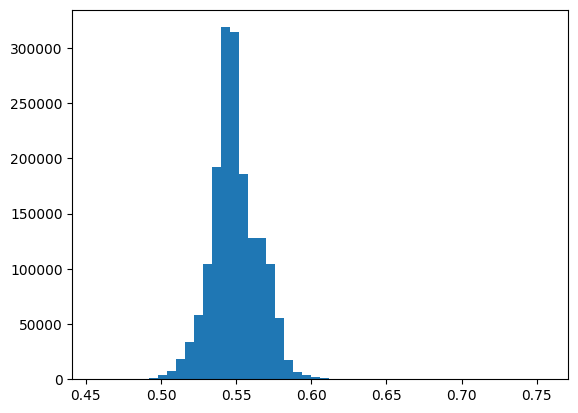

In [58]:
plt.hist(predict, bins=50)
plt.show()

In [59]:
test

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-07-07 22:23:00,1.39165,-0.000029,0,-0.000129,-0.020394,-0.000201,0.000424,-0.000019,0.000070,1.0,...,-0.000017,-0.000010,0.000022,0.000038,3.353406e-05,0.000077,0.000078,0.000078,0.000078,0.000078
2009-07-07 22:24:00,1.39162,-0.000022,0,-0.000139,-0.128821,-0.000180,0.000446,-0.000007,0.000070,0.0,...,-0.000019,-0.000017,-0.000010,0.000022,3.832299e-05,0.000070,0.000077,0.000078,0.000078,0.000078
2009-07-07 22:25:00,1.39158,-0.000029,0,-0.000151,-0.311325,-0.000151,0.000345,-0.000026,0.000069,0.0,...,-0.000007,-0.000019,-0.000017,-0.000010,2.155660e-05,0.000070,0.000070,0.000077,0.000078,0.000078
2009-07-07 22:26:00,1.39176,0.000129,1,-0.000157,0.899067,-0.000280,0.000194,0.000026,0.000070,0.0,...,-0.000026,-0.000007,-0.000019,-0.000017,-9.580815e-06,0.000069,0.000070,0.000070,0.000077,0.000078
2009-07-07 22:27:00,1.39185,0.000065,1,-0.000160,1.588683,-0.000345,0.000129,0.000055,0.000071,1.0,...,0.000026,-0.000026,-0.000007,-0.000019,-1.676576e-05,0.000070,0.000069,0.000070,0.000070,0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29 23:55:00,1.08764,-0.000064,0,0.000080,0.573415,-0.000340,0.000120,-0.000028,0.000031,0.0,...,-0.000012,-0.000012,-0.000006,-0.000006,-9.108428e-19,0.000030,0.000030,0.000030,0.000030,0.000030
2020-04-29 23:56:00,1.08757,-0.000064,0,0.000085,0.123215,-0.000276,0.000184,-0.000043,0.000032,0.0,...,-0.000028,-0.000012,-0.000012,-0.000006,-6.128803e-06,0.000031,0.000030,0.000030,0.000030,0.000030
2020-04-29 23:57:00,1.08759,0.000018,1,0.000090,0.220259,-0.000294,0.000166,-0.000037,0.000032,0.0,...,-0.000043,-0.000028,-0.000012,-0.000012,-6.128916e-06,0.000032,0.000031,0.000030,0.000030,0.000030


In [60]:
test_standardized = (test-mu) / std
test_standardized

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-07-07 22:23:00,0.509205,-0.159710,-0.815901,-0.119215,-0.021957,0.582511,-0.319249,-0.186242,-0.754908,1.22564,...,-0.162976,-0.093197,0.209208,0.372041,0.325530,-0.686548,-0.681709,-0.684086,-0.681870,-0.685424
2009-07-07 22:24:00,0.508928,-0.119807,-0.815901,-0.127933,-0.101944,0.607479,-0.294573,-0.069936,-0.755265,-0.81590,...,-0.186242,-0.162977,-0.093198,0.209207,0.372040,-0.754909,-0.686548,-0.681710,-0.684086,-0.681870
2009-07-07 22:25:00,0.508560,-0.159718,-0.815901,-0.138969,-0.236576,0.640773,-0.409666,-0.256038,-0.763837,-0.81590,...,-0.069936,-0.186243,-0.162978,-0.093198,0.209205,-0.755265,-0.754909,-0.686549,-0.681710,-0.684087
2009-07-07 22:26:00,0.510219,0.718229,1.225639,-0.144273,0.656327,0.490968,-0.582355,0.255730,-0.758743,-0.81590,...,-0.256038,-0.069936,-0.186243,-0.162978,-0.093199,-0.763838,-0.755266,-0.754910,-0.686549,-0.681711
2009-07-07 22:27:00,0.511048,0.359038,1.225639,-0.146955,1.165054,0.416080,-0.656352,0.534857,-0.753719,1.22564,...,0.255730,-0.256038,-0.069937,-0.186244,-0.162979,-0.758743,-0.763838,-0.755266,-0.754910,-0.686550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29 23:55:00,-2.292671,-0.357503,-0.815901,0.072040,0.416094,0.421500,-0.667564,-0.268019,-1.139835,-0.81590,...,-0.119197,-0.119197,-0.059673,-0.059673,-0.000151,-1.149917,-1.144202,-1.145443,-1.147246,-1.145443
2020-04-29 23:56:00,-2.293316,-0.357526,-0.815901,0.076612,0.083983,0.496038,-0.593914,-0.416853,-1.128087,-0.81590,...,-0.268019,-0.119197,-0.119198,-0.059674,-0.059674,-1.139835,-1.149917,-1.144203,-1.145443,-1.147247
2020-04-29 23:57:00,-2.293132,0.102044,1.225639,0.081185,0.155572,0.474740,-0.614958,-0.357320,-1.127548,-0.81590,...,-0.416853,-0.268019,-0.119198,-0.119199,-0.059675,-1.128087,-1.139836,-1.149918,-1.144203,-1.145444


In [61]:
test_standardized.describe()

,price,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,...,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06,3.932990e+06
mean,-9.028283e-01,-4.325528e-04,1.484564e-01,-4.538438e-03,-6.116648e-03,9.411525e-02,-8.870886e-02,-7.564018e-04,-1.467054e-01,1.484576e-01,...,-7.566155e-04,-7.569473e-04,-7.578112e-04,-7.585928e-04,-7.593811e-04,-1.467057e-01,-1.467059e-01,-1.467062e-01,-1.467065e-01,-1.467068e-01
std,1.117649e+00,8.861076e-01,1.019210e+00,8.040518e-01,9.980061e-01,8.558484e-01,8.550626e-01,8.761232e-01,8.618333e-01,1.019210e+00,...,8.761232e-01,8.761231e-01,8.761222e-01,8.761211e-01,8.761202e-01,8.618333e-01,8.618334e-01,8.618334e-01,8.618334e-01,8.618334e-01
min,-2.784181e+00,-8.303433e+01,-8.159007e-01,-1.229679e+01,-5.084606e+00,-2.758923e+01,-8.043185e-01,-4.930106e+01,-1.334745e+00,-8.158996e-01,...,-4.930106e+01,-4.930106e+01,-4.930101e+01,-4.930095e+01,-4.930090e+01,-1.334746e+00,-1.334746e+00,-1.334747e+00,-1.334747e+00,-1.334748e+00
25%,-1.969728e+00,-3.427243e-01,-8.159007e-01,-3.205295e-01,-7.725576e-01,-1.309215e-01,-6.173592e-01,-3.497716e-01,-7.013696e-01,-8.158996e-01,...,-3.497717e-01,-3.497720e-01,-3.497707e-01,-3.497713e-01,-3.497719e-01,-7.013698e-01,-7.013700e-01,-7.013701e-01,-7.013698e-01,-7.013699e-01
50%,-9.403494e-01,-8.450515e-05,-8.159007e-01,-9.382413e-04,-5.185490e-03,3.453893e-01,-3.426582e-01,-1.476374e-04,-3.441715e-01,-8.158996e-01,...,-1.477340e-04,-1.480724e-04,-1.490810e-04,-1.500639e-04,-1.510038e-04,-3.441719e-01,-3.441723e-01,-3.441727e-01,-3.441731e-01,-3.441736e-01
75%,5.797031e-02,3.419353e-01,1.225639e+00,3.157876e-01,7.622906e-01,6.214161e-01,1.342518e-01,3.475154e-01,1.759720e-01,1.225640e+00,...,3.475153e-01,3.475150e-01,3.475136e-01,3.475129e-01,3.475116e-01,1.759716e-01,1.759713e-01,1.759709e-01,1.759706e-01,1.759702e-01
max,1.639964e+00,8.553086e+01,1.225639e+00,1.248720e+01,5.044818e+00,8.155944e-01,2.173378e+01,5.226494e+01,1.997591e+01,1.225640e+00,...,5.226495e+01,5.226494e+01,5.226488e+01,5.226482e+01,5.226477e+01,1.997591e+01,1.997591e+01,1.997591e+01,1.997592e+01,1.997592e+01


In [62]:
model.evaluate(test_standardized[cols], test['dir'])

122906/122906 ━━━━━━━━━━━━━━━━━━━━ 86s 697us/step - accuracy: 0.4744 - loss: 0.7028


[0.702671229839325, 0.4723919928073883]

In [63]:
pred = model.predict(test_standardized[cols])
pred

122906/122906 ━━━━━━━━━━━━━━━━━━━━ 86s 696us/step


array([[0.5394124 ],
       [0.5487869 ],
       [0.5452515 ],
       ...,
       [0.53952014],
       [0.5269011 ],
       [0.5337136 ]], dtype=float32)

In [64]:
test['probability'] = model.predict(test_standardized[cols])

122906/122906 ━━━━━━━━━━━━━━━━━━━━ 100s 814us/step


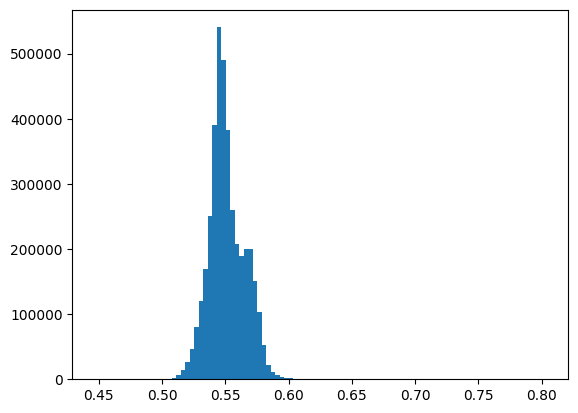

In [69]:
plt.hist(test['probability'], bins=100)
plt.show()

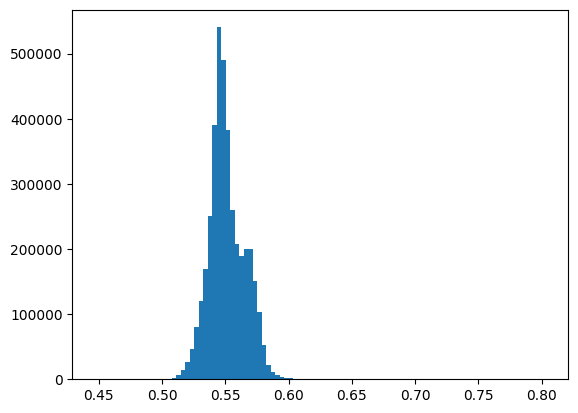

In [68]:
plt.hist(pred, bins=100)
plt.show()

In [70]:
threshold = 0.55

In [71]:
test['position'] = np.where(test.probability < (1-threshold), -1, np.nan)
test['position'] = np.where(test.probability > threshold, 1, test.position)

In [72]:
test.index = test.index.tz_localize('utc')
test['NYTime'] = test.index.tz_convert("America/New_York")
test['hour'] = test.NYTime.dt.hour

In [73]:
test['position'] = np.where(~test.hour.between(2,12), 0, test.position)

In [74]:
test.position.value_counts(dropna=False)

position
 0.0    2092623
 1.0    1084150
 NaN     756216
-1.0          1
Name: count, dtype: int64

In [76]:
test['position'] = test.position.ffill()

In [77]:
test.position.value_counts(dropna=False)

position
 0.0    2101023
 1.0    1831964
-1.0          3
Name: count, dtype: int64

In [78]:
test['strategy'] = test['position'] * test['returns']

In [82]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)

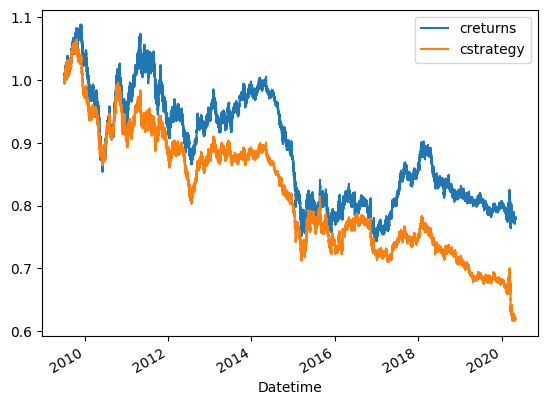

In [83]:
test[['creturns', 'cstrategy']].plot()
plt.show()

In [84]:
ptc = 0.000059

In [85]:
test['trades'] = test.position.diff().abs()
test.trades.value_counts()

trades
0.0    3927281
1.0       5706
2.0          2
Name: count, dtype: int64

In [86]:
test['strategy_net'] = test.strategy - test.trades * ptc

In [87]:
test['cstrategy_net'] = test['strategy_net'].cumsum().apply(np.exp)

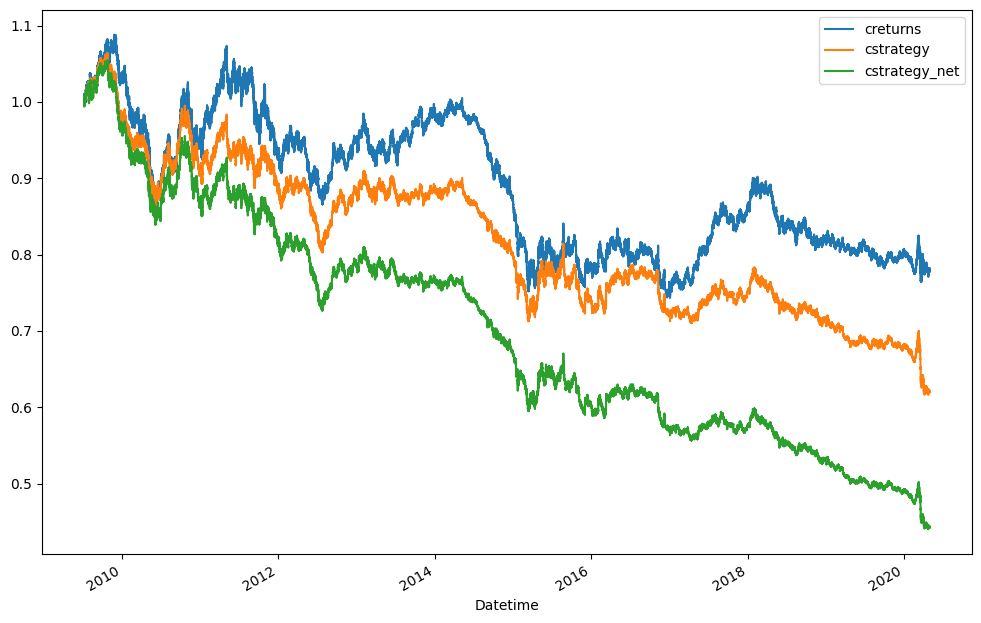

In [88]:
test[['creturns', 'cstrategy', 'cstrategy_net']].plot(figsize=(12, 8))
plt.show()

In [89]:
model

<Sequential name=sequential_1, built=True>

In [93]:
mu

price         1.336400e+00
returns       1.521616e-08
dir           3.996497e-01
sma           1.092615e-06
boll          9.370758e-03
min          -7.040285e-04
max           7.029846e-04
mom           1.520158e-08
vol           1.480041e-04
dir_lag_1     3.996491e-01
dir_lag_2     3.996491e-01
dir_lag_3     3.996497e-01
dir_lag_4     3.996497e-01
dir_lag_5     3.996497e-01
sma_lag_1     1.092883e-06
sma_lag_2     1.093133e-06
sma_lag_3     1.093361e-06
sma_lag_4     1.093567e-06
sma_lag_5     1.093754e-06
boll_lag_1    9.372024e-03
boll_lag_2    9.373483e-03
boll_lag_3    9.374956e-03
boll_lag_4    9.376307e-03
boll_lag_5    9.377631e-03
min_lag_1    -7.040291e-04
min_lag_2    -7.040297e-04
min_lag_3    -7.040304e-04
min_lag_4    -7.040311e-04
min_lag_5    -7.040317e-04
max_lag_1     7.029844e-04
max_lag_2     7.029842e-04
max_lag_3     7.029839e-04
max_lag_4     7.029837e-04
max_lag_5     7.029835e-04
mom_lag_1     1.521153e-08
mom_lag_2     1.524637e-08
mom_lag_3     1.535024e-08
m

In [94]:
std

price         0.108502
returns       0.000180
dir           0.489826
sma           0.001093
boll          1.355570
min           0.000863
max           0.000874
mom           0.000103
vol           0.000103
dir_lag_1     0.489826
dir_lag_2     0.489826
dir_lag_3     0.489826
dir_lag_4     0.489826
dir_lag_5     0.489826
sma_lag_1     0.001093
sma_lag_2     0.001093
sma_lag_3     0.001093
sma_lag_4     0.001093
sma_lag_5     0.001093
boll_lag_1    1.355571
boll_lag_2    1.355572
boll_lag_3    1.355574
boll_lag_4    1.355575
boll_lag_5    1.355577
min_lag_1     0.000863
min_lag_2     0.000863
min_lag_3     0.000863
min_lag_4     0.000863
min_lag_5     0.000863
max_lag_1     0.000874
max_lag_2     0.000874
max_lag_3     0.000874
max_lag_4     0.000874
max_lag_5     0.000874
mom_lag_1     0.000103
mom_lag_2     0.000103
mom_lag_3     0.000103
mom_lag_4     0.000103
mom_lag_5     0.000103
vol_lag_1     0.000103
vol_lag_2     0.000103
vol_lag_3     0.000103
vol_lag_4     0.000103
vol_lag_5  

In [96]:
model.save('DNN_model.keras')

In [97]:
import pickle

In [98]:
params = {'mu': mu, 'std': std}

In [99]:
pickle.dump(params, open('params.pkl', 'wb'))